# Proyecto:  modelos predictivos de regresión lineal uni-variable
**Descripción general**
El proyecto consiste en crear modelos predictivos de regresión lineal uni-variable sencillos de la forma:

**y = f(x) =  mx +b**

Donde:

y = la variable dependiente
x = variable independiente
m = pendiente de la recta(parámetro del modelo)
b = intercepto(parámetro del modelo)


In [2]:
#Importando librerias necesarias para el proyecto
import numpy as np
import matplotlib.pyplot as plt
#scikit-learn 
import seaborn as sns
import pandas as pd


In [3]:
#Cargando datos
datos = np.load("proyecto_training_data.npy")
#Verificando la forma de los datos
filas,columnas = datos.shape
#Se utilizará el 80% de los datos para entrenamiento y el 20% para validación
porcentaje_datos_entrenamiento=0.8
datos_entrenamiento = datos[0:int(filas*porcentaje_datos_entrenamiento)]
datos_validacion = datos[int(filas*porcentaje_datos_entrenamiento):filas]

In [4]:
#Estructura de los datos: SalePrice OverallQual 1stFlrSF TotRmsAbvGrd YearBuilt LotFrontage
print(datos)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


## Análisis exploratorio de datos
Se calcularán los siguientes estadísticas para cada variable: 
* media
* valor máximo
* valor mínimo 
* rango
* desviación estándar 

In [5]:
media = np.nanmean(datos_entrenamiento,axis=0)
maximo = np.nanmax(datos_entrenamiento,axis=0)
minimo = np.nanmin(datos_entrenamiento,axis=0)
rango = maximo - minimo
desviacion_estandar = np.nanstd(datos_entrenamiento,axis=0)

In [6]:
def imprimir_estadistica(estadistica,x):
    print('-------------------------------------')
    print('\t',estadistica)
    print('SalePrice:\t',x[0])
    print('OverallQual:\t',x[1]) 
    print('1stFlrSF:\t',x[2]) 
    print('TotRmsAbvGrd:\t',x[3]) 
    print('YearBuilt:\t',x[4]) 
    print('LotFrontage:\t',x[5])
imprimir_estadistica('Media',media)
imprimir_estadistica('Valor máximo',maximo)
imprimir_estadistica('Valor mínimo',minimo)
imprimir_estadistica('Rango',rango)
imprimir_estadistica('Desviación estándar',desviacion_estandar)

-------------------------------------
	 Media
SalePrice:	 180590.27739726027
OverallQual:	 6.101027397260274
1stFlrSF:	 1156.3236301369864
TotRmsAbvGrd:	 6.4854452054794525
YearBuilt:	 1971.451198630137
LotFrontage:	 69.94698544698545
-------------------------------------
	 Valor máximo
SalePrice:	 755000.0
OverallQual:	 10.0
1stFlrSF:	 3228.0
TotRmsAbvGrd:	 14.0
YearBuilt:	 2010.0
LotFrontage:	 313.0
-------------------------------------
	 Valor mínimo
SalePrice:	 34900.0
OverallQual:	 1.0
1stFlrSF:	 334.0
TotRmsAbvGrd:	 2.0
YearBuilt:	 1875.0
LotFrontage:	 21.0
-------------------------------------
	 Rango
SalePrice:	 720100.0
OverallQual:	 9.0
1stFlrSF:	 2894.0
TotRmsAbvGrd:	 12.0
YearBuilt:	 135.0
LotFrontage:	 292.0
-------------------------------------
	 Desviación estándar
SalePrice:	 78781.95108033362
OverallQual:	 1.377435193240741
1stFlrSF:	 373.620331503586
TotRmsAbvGrd:	 1.6084517167387253
YearBuilt:	 29.93888206867768
LotFrontage:	 23.4659548199304


## Histogramas de cada variable

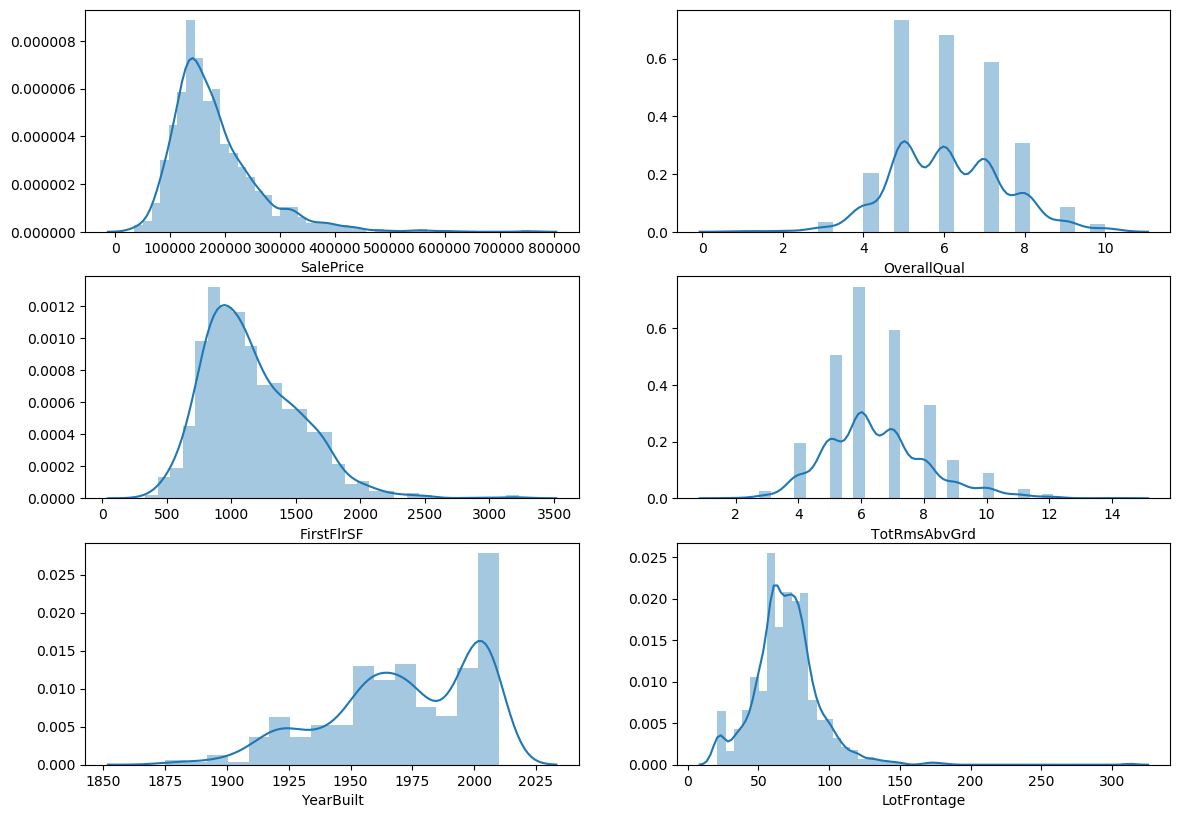

In [7]:
SalePrice = datos_entrenamiento[:,0]
OverallQual = datos_entrenamiento[:,1]
FirstFlrSF = datos_entrenamiento[:,2]
TotRmsAbvGrd = datos_entrenamiento[:,3]
YearBuilt = datos_entrenamiento[:,4]
#Existen datos que nos son números (nan) y se quitarán para realizar el cálculo
LotFrontageNan = np.isnan(datos_entrenamiento[:,5])
LotFrontage = datos_entrenamiento[LotFrontageNan==False,5]
SalePriceForLotFrontage = datos_entrenamiento[LotFrontageNan==False,0]


figura = plt.figure(dpi= 100,figsize=(14, 10))
plt.subplot(3,2,1)
sns.distplot(pd.Series(SalePrice, name="SalePrice"))
plt.subplot(3,2,2)
sns.distplot(pd.Series(OverallQual, name="OverallQual"))
plt.subplot(3,2,3)
sns.distplot(pd.Series(FirstFlrSF, name="FirstFlrSF"))
plt.subplot(3,2,4)
sns.distplot(pd.Series(TotRmsAbvGrd, name="TotRmsAbvGrd"))
plt.subplot(3,2,5)
sns.distplot(pd.Series(YearBuilt, name="YearBuilt"))
plt.subplot(3,2,6)
sns.distplot(pd.Series(LotFrontage, name="LotFrontage"))




## Coeficientes de correlacción y gráficas entre la variable dependiente y las independientes

0.7939900504626405
0.6162887000998717


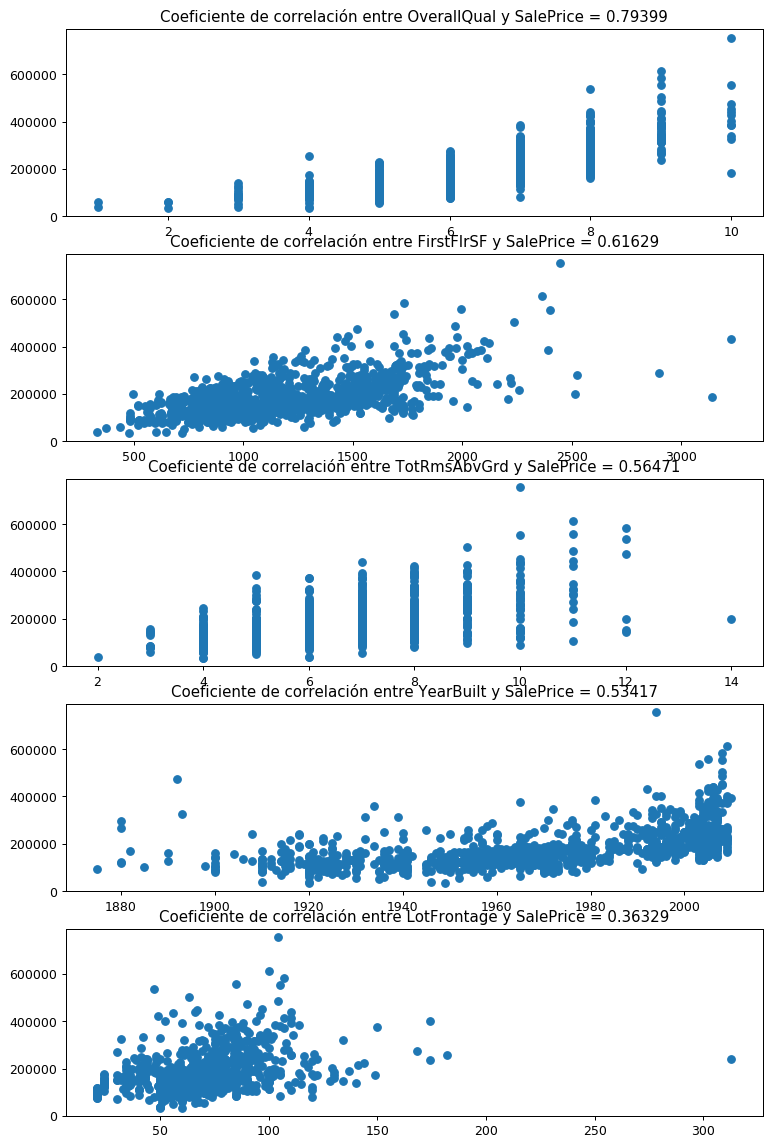

In [327]:
coef_corr_OverallQual = np.corrcoef(OverallQual, SalePrice)[0,1]
coef_corr_FirstFlrSF = np.corrcoef(FirstFlrSF, SalePrice)[0,1]
coef_corr_TotRmsAbvGrd = np.corrcoef(TotRmsAbvGrd, SalePrice)[0,1]
coef_corr_YearBuilt = np.corrcoef(YearBuilt, SalePrice)[0,1]
coef_corr_LotFrontage = np.corrcoef(LotFrontage, SalePriceForLotFrontage)[0,1]

figura = plt.figure(dpi= 90,figsize=(10, 16))

plt.subplot(5,1,1) 
plt.title("Coeficiente de correlación entre OverallQual y SalePrice = %0.5f" %coef_corr_OverallQual)
plt.scatter(OverallQual, SalePrice)

plt.subplot(5,1,2)
plt.title("Coeficiente de correlación entre FirstFlrSF y SalePrice = %0.5f" %coef_corr_FirstFlrSF)
plt.scatter(FirstFlrSF, SalePrice)

plt.subplot(5,1,3)
plt.title("Coeficiente de correlación entre TotRmsAbvGrd y SalePrice = %0.5f" %coef_corr_TotRmsAbvGrd)
plt.scatter(TotRmsAbvGrd, SalePrice)


plt.subplot(5,1,4)
plt.title("Coeficiente de correlación entre YearBuilt y SalePrice = %0.5f" %coef_corr_YearBuilt)
plt.scatter(YearBuilt, SalePrice)


plt.subplot(5,1,5)
plt.title("Coeficiente de correlación entre LotFrontage y SalePrice = %0.5f" %coef_corr_LotFrontage)
plt.scatter(LotFrontage, SalePriceForLotFrontage)

print(coef_corr_OverallQual)
print(coef_corr_FirstFlrSF)


## Elección de variables independientes
Se elijen las variables independientes **OverallQual** y **FirstFlrSF** debido a que el coeficiente de correlación es mayor para las mismas:

* Coeficiente de correlación entre OverallQual y SalePrice: 0.79399
* Coeficiente de correlación entre FirstFlrSF y SalePrice: 0.61629

In [248]:
def entrenar_modelo_regresion_lineal(x,y,epochs,imprimir_error_cada,lr):
    matriz_para_entrenar = np.column_stack((x,np.ones_like(x)))
    parametros_modelo = np.array([0,0])
    error = np.zeros(epochs,dtype=float)
    modelo_resultante = dict()
    for n in range(epochs):
        modelo_resultante[n]=parametros_modelo
        #yhat=np.inner(parametros_modelo,matriz_para_entrenar)
        yhat=calcular_yhat(parametros_modelo,matriz_para_entrenar)
        error[n]= 0.5*np.mean(np.power(y-yhat,2))
        dif_yhat_y = yhat-y
        gradiente_m_b = np.mean(np.column_stack((dif_yhat_y,dif_yhat_y))*matriz_para_entrenar,axis=0,dtype=np.float64)
        parametros_modelo = parametros_modelo - lr*gradiente_m_b
        if (n>0 and n%imprimir_error_cada==0):
            print("Iteracion", n, " Error", error[n]);
    return modelo_resultante,error

In [169]:
def calcular_yhat(param_modelo,matriz_entrenamiento):
    return np.inner(param_modelo,matriz_entrenamiento)

In [170]:
def visualizar_error(errores):
    plt.plot(np.linspace(0,np.shape(errores)[0]-1,np.shape(errores)[0],dtype=int), errores)
    plt.title('Error por cada iteración')
    plt.xlabel('Iteración')
    plt.ylabel('Error')
    plt.grid()
    plt.show()

In [298]:
def visualizar_modelo(modelos, n, x, y, x_label, y_label):
    matriz_para_entrenar = np.column_stack((x,np.ones_like(x)))
    fig = plt.figure(dpi=75, figsize=(10, 8))
    plt.title("Modelo en función del tiempo (No. de iteración).")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x, y)    
    for cont in range(0, len(modelos), n):
        yhat=calcular_yhat(modelos[cont],matriz_para_entrenar)
        plt.plot(x, yhat)
        plt.annotate("iteración = %d" % (cont), (np.max(x), calcular_yhat(modelos[cont], np.array([np.max(x),1]))))

## Entrenando modelo para la variable: OverallQual

In [310]:
modelos,errores =entrenar_modelo_regresion_lineal (OverallQual,SalePrice,355,50,0.00015)

Iteracion 50  Error 11252763052.5115
Iteracion 100  Error 6789019792.557671
Iteracion 150  Error 4346283814.939262
Iteracion 200  Error 3009486622.447997
Iteracion 250  Error 2277883017.679471
Iteracion 300  Error 1877454439.722542
Iteracion 350  Error 1658252028.1146615


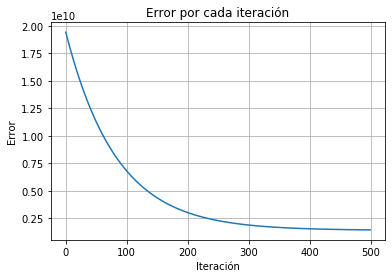

In [306]:
visualizar_error(errores)

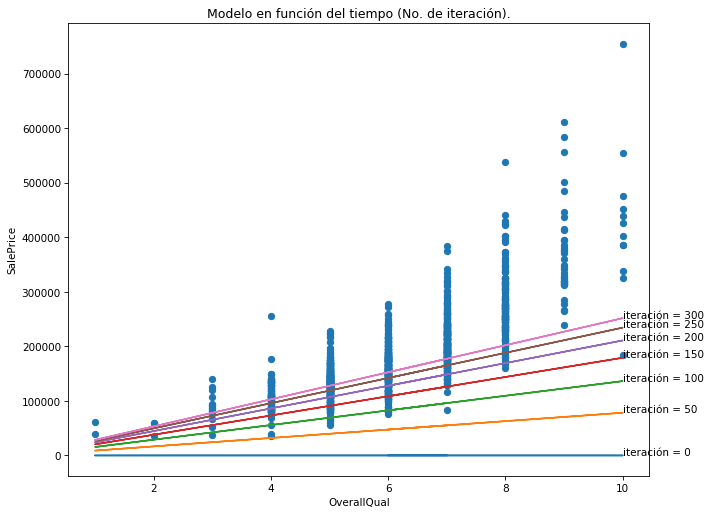

In [309]:
visualizar_modelo(modelos,50,OverallQual,SalePrice, "OverallQual", "SalePrice")

## Entrenando modelo para la variable: FirstFlrSF

In [295]:
modelos,errores =entrenar_modelo_regresion_lineal (FirstFlrSF,SalePrice,100,10,0.000000033123)

Iteracion 10  Error 8365459416.480031
Iteracion 20  Error 4314565195.193664
Iteracion 30  Error 2828749025.854026
Iteracion 40  Error 2283770664.806859
Iteracion 50  Error 2083879573.4592586
Iteracion 60  Error 2010562077.1129384
Iteracion 70  Error 1983670155.8551908
Iteracion 80  Error 1973806541.506818
Iteracion 90  Error 1970188692.249059


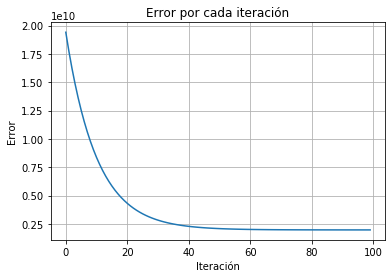

In [296]:
visualizar_error(errores)

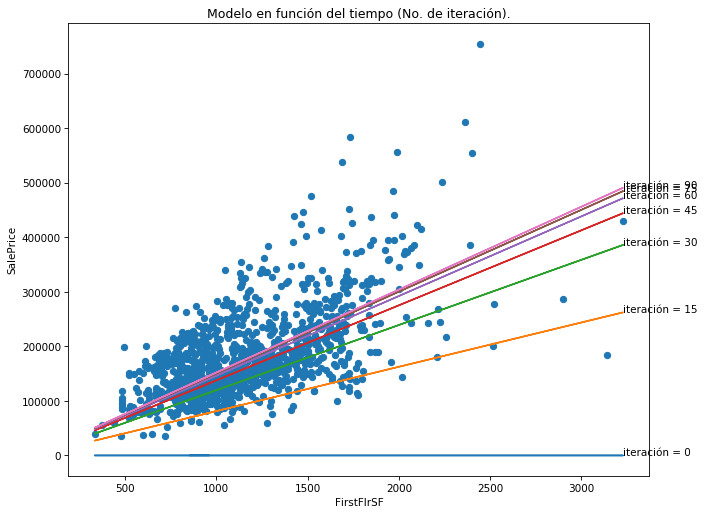

In [300]:
visualizar_modelo(modelos,15,FirstFlrSF,SalePrice, "FirstFlrSF", "SalePrice")